# 1. Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
import seaborn as sb

%matplotlib inline

Sorry I don't like warnings :(

In [2]:
import warnings
warnings.filterwarnings('ignore')

- Normalize price for each area
- 

# 2.Reading the data in

In [3]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


# 3.Data PreProcessing

## 3.1.Null Values
Check if there is any Nan values inside dataframe

In [4]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

Oops, yes we have Nan values :(

Let's deal with it

In [5]:
df = df.fillna(df.mean())

As there sre some Nan values which can not be filled with `mean()` values, So we are going to drop those

In [6]:
df = df.dropna()
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

## 3.2.Convert Data Types
Let's check data types

In [7]:
print(df.dtypes)

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object


In [8]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [9]:
df['Parking'] = pd.to_numeric(df['Parking'], errors = 'coerce')
df['Parking'] = df['Parking'].astype('int64')
df['Warehouse'] = pd.to_numeric(df['Warehouse'], errors = 'coerce')
df['Warehouse'] = df['Warehouse'].astype('int64')
df['Elevator'] = pd.to_numeric(df['Elevator'], errors = 'coerce')
df['Elevator'] = df['Elevator'].astype('int64')
df['Area'] = pd.to_numeric(df['Area'], errors = 'coerce')

After converting `Area` data type, because of invalid values, some of them will become null

In [10]:
df = df.fillna(df.mean())
df['Area'] = df['Area'].astype('int64')
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67
3478,82,2,0,1,1,Parand,3.600000e+08,12000.00


## 3.3.Encode Address
Let's encode adress with `LabelEncoder` and create a new column named `AddrEncode` for the values

In [11]:
le = preprocessing.LabelEncoder()
df['AddrEncode'] = le.fit_transform(df['Address'])
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AddrEncode
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67,156
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67,156
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33,117
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,152
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,150


Now, we need to create a column named `Options` as how many options(Parking, Elevator, Warehouse) it has

In [12]:
df['Options'] = df[['Parking', 'Warehouse', 'Elevator']].sum(axis = 1)
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AddrEncode,Options
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67,163,3
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67,105,3
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67,115,0
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67,39,3
3478,82,2,0,1,1,Parand,3.600000e+08,12000.00,115,2


### Extract main features
Let's extract some features for regression

### Let's be a data scientist :)
Let's plot Price values with respect to Area and AddrEncode:

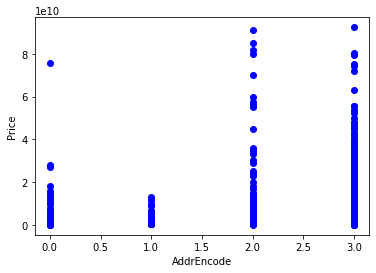

In [44]:
plt.scatter(cdf.Options,cdf.Price,  color='blue')
plt.xlabel("AddrEncode")
plt.ylabel("Price")
plt.show()

### Histogram plots

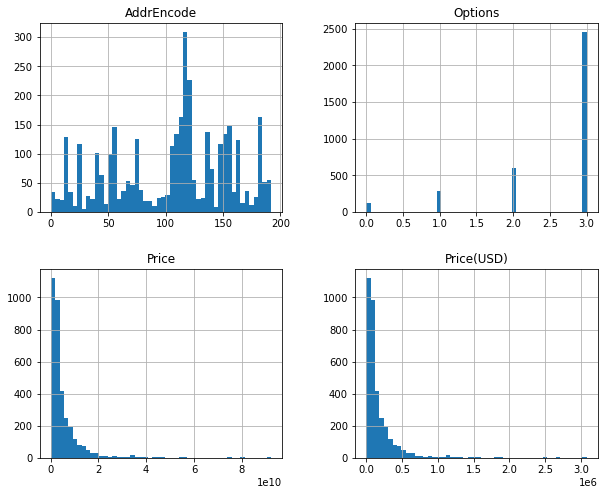

In [43]:
cdf.hist(bins=50, figsize=(10, 8))
plt.show()

In [13]:
cdf = df[['Area', 'AddrEncode', 'Options', 'Price', 'Price(USD)']]
cdf.head(10)

,Area,AddrEncode,Options,Price,Price(USD)
0,63,156,3,1.850000e+09,61666.67
1,60,156,3,1.850000e+09,61666.67
2,79,117,3,5.500000e+08,18333.33
3,95,152,3,9.025000e+08,30083.33
4,123,150,3,7.000000e+09,233333.33
5,70,106,2,2.050000e+09,68333.33
6,87,117,3,6.000000e+08,20000.00
7,59,156,3,2.150000e+09,71666.67
8,54,13,2,4.930000e+08,16433.33
9,71,183,3,2.370000e+09,79000.00


## Distribution Plot

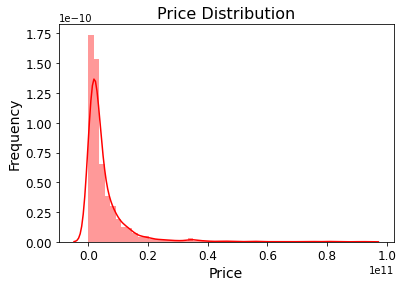

In [14]:

sb.distplot(cdf['Price'], color = 'r')
plt.title('Price Distribution', fontsize = 16)
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Heatmap Plot
Heatmap plot shows us the correlations between variables

<AxesSubplot:>

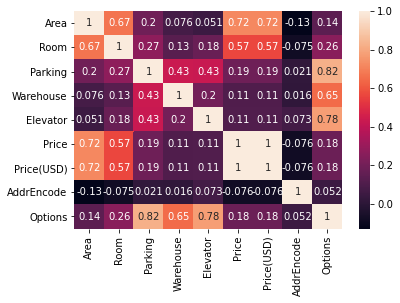

In [15]:
sb.heatmap(df.corr(), annot=True)

In [35]:
from sklearn.model_selection import train_test_split
x = df[['Area', 'AddrEncode', 'Room', 'Options']].values
y = df[['Price']]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle = True)

In [20]:
train_x.shape

(2764, 4)

In [21]:
test_x.shape

(692, 4)

In [63]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
train_x = np.asanyarray(train[['Area', 'AddrEncode', 'Room', 'Options']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area', 'AddrEncode', 'Room', 'Options']])
test_y = np.asanyarray(test[['Price']])

Coefficients:  [[7.06006684e+07 2.14483854e+06 1.67492757e+09 5.32000135e+08]]
Intercept:  [-7.21998606e+09]


In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[6.82212487e+07 7.17861859e+05 1.72982628e+09 6.12934689e+08]]
Intercept:  [-7.20839354e+09]


In [29]:
from sklearn.metrics import r2_score

test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 2882468859.66
Residual sum of squares (MSE): 35423796390200569856.00
R2-score: 0.53


## Polynomial regression


In [140]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [141]:

train_x = np.asanyarray(train[['Area', 'AddrEncode', 'Room', 'Elevator', 'Parking', 'Warehouse']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area', 'AddrEncode', 'Room', 'Elevator', 'Parking', 'Warehouse']])
test_y = np.asanyarray(test[['Price']])



array([[  1.,  63., 156., ...,   1.,   1.,   1.],
       [  1.,  60., 156., ...,   1.,   1.,   1.],
       [  1.,  79., 117., ...,   1.,   1.,   1.],
       ...,
       [  1.,  75., 115., ...,   0.,   0.,   0.],
       [  1., 105.,  39., ...,   1.,   1.,   1.],
       [  1.,  82., 115., ...,   0.,   0.,   1.]])

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.,  51., 156., ...,   4.,   4.,   4.],
       [  1.,  87., 117., ...,   4.,   6.,   9.],
       [  1.,  90., 141., ...,   4.,   2.,   1.],
       ...,
       [  1., 106., 183., ...,   4.,   6.,   9.],
       [  1., 120., 120., ...,   9.,   6.,   4.],
       [  1., 150., 187., ...,   9.,   9.,   9.]])

In [37]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00 -4.21844869e+07 -2.47873678e+07  3.39956891e+08
  -2.07398403e+09 -1.65644721e+05 -1.02607000e+05  3.65850671e+07
   4.61145903e+07  1.31369406e+05  1.18865960e+07 -5.17125541e+06
  -7.59708612e+08 -1.37969907e+09  4.45768265e+08]]
Intercept:  [3.46262061e+09]


In [38]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 2756705096.05
Residual sum of squares (MSE): 73635095485882056704.00
R2-score: 0.28


https://medium.com/codex/house-price-prediction-with-machine-learning-in-python-cf9df744f7ff

https://www.youtube.com/watch?v=fw5rkjq4Tfo